In [2]:
import numpy as np
from hmmlearn import hmm
import pandas as pd
df=pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
selected_columns = ["LIMIT_BAL","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default.payment.next.month"]

In [4]:
data = df[selected_columns].values
n_components = 4  # 4 SEGMENTS
model = hmm.GaussianHMM(n_components=n_components)

In [6]:
# Fit the HMM model to the data
model.fit(data)
hidden_states = model.predict(data)
df['default.payment.next.month'] = hidden_states
print(df)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  

In [7]:
# The state transition matrix
print("State Transition Matrix:")
print(model.transmat_)

State Transition Matrix:
[[0.23498182 0.17114743 0.29250578 0.30136497]
 [0.23669706 0.16574166 0.29060388 0.30695739]
 [0.22936326 0.15429888 0.33276861 0.28356925]
 [0.22986523 0.17221034 0.28574383 0.31218061]]


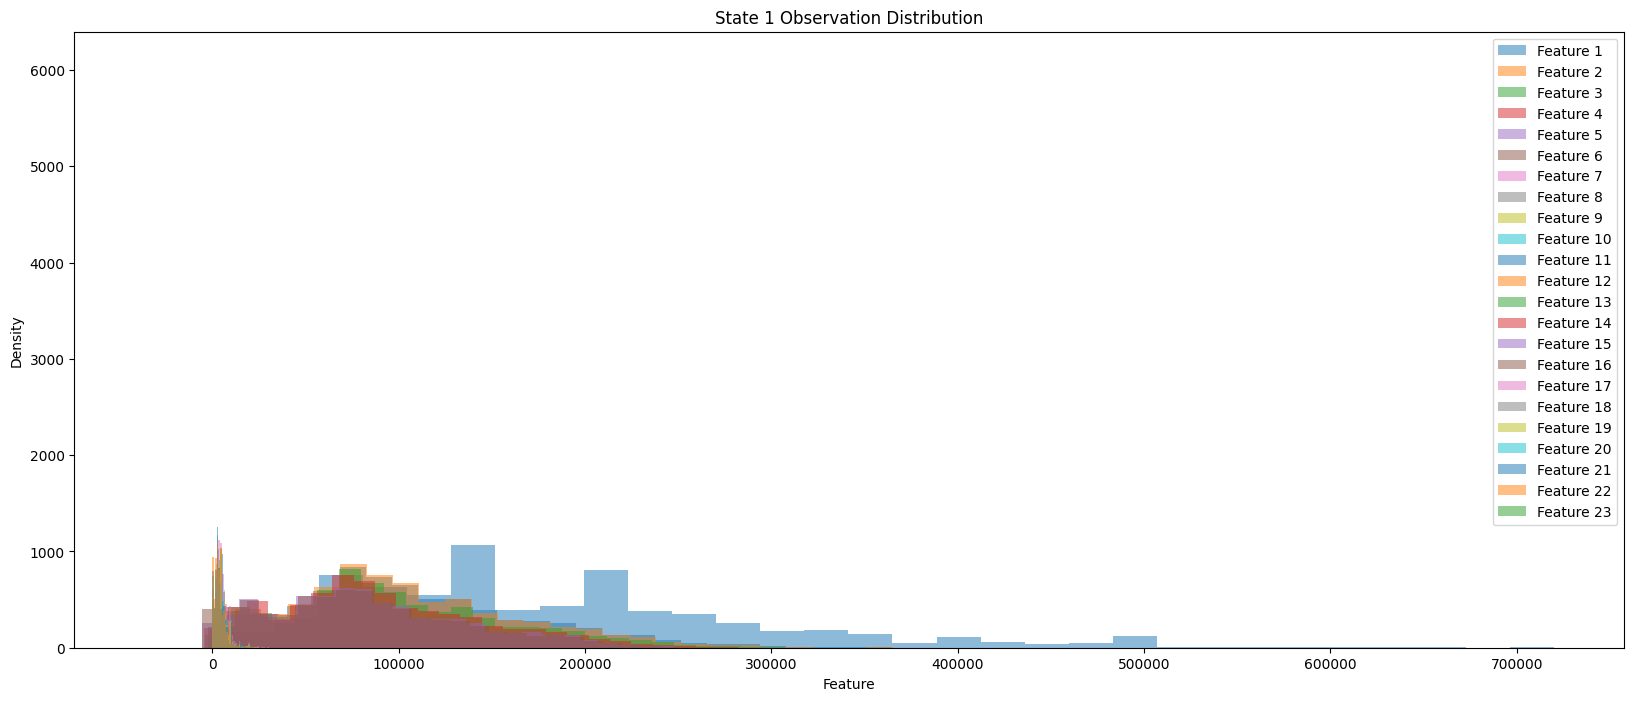

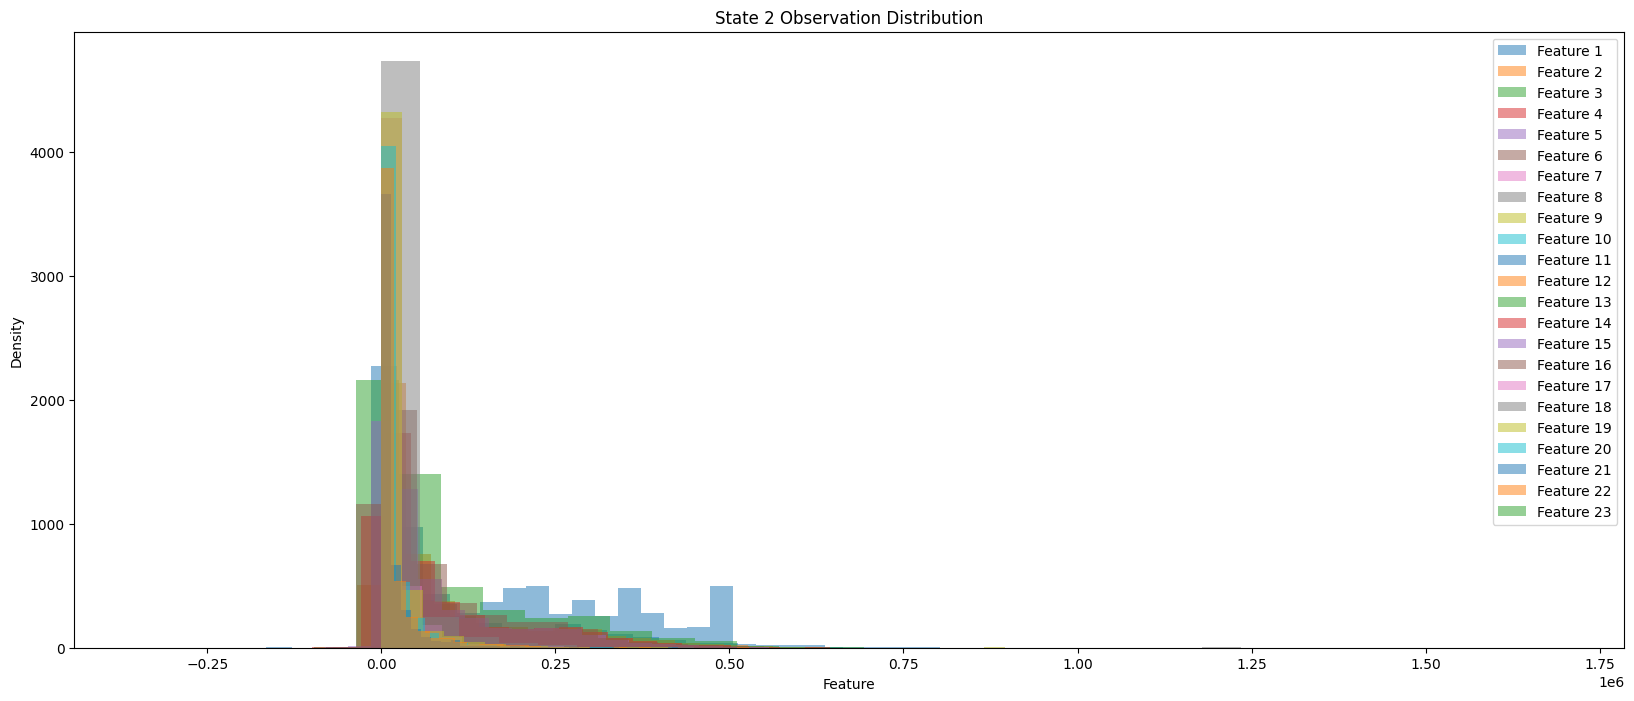

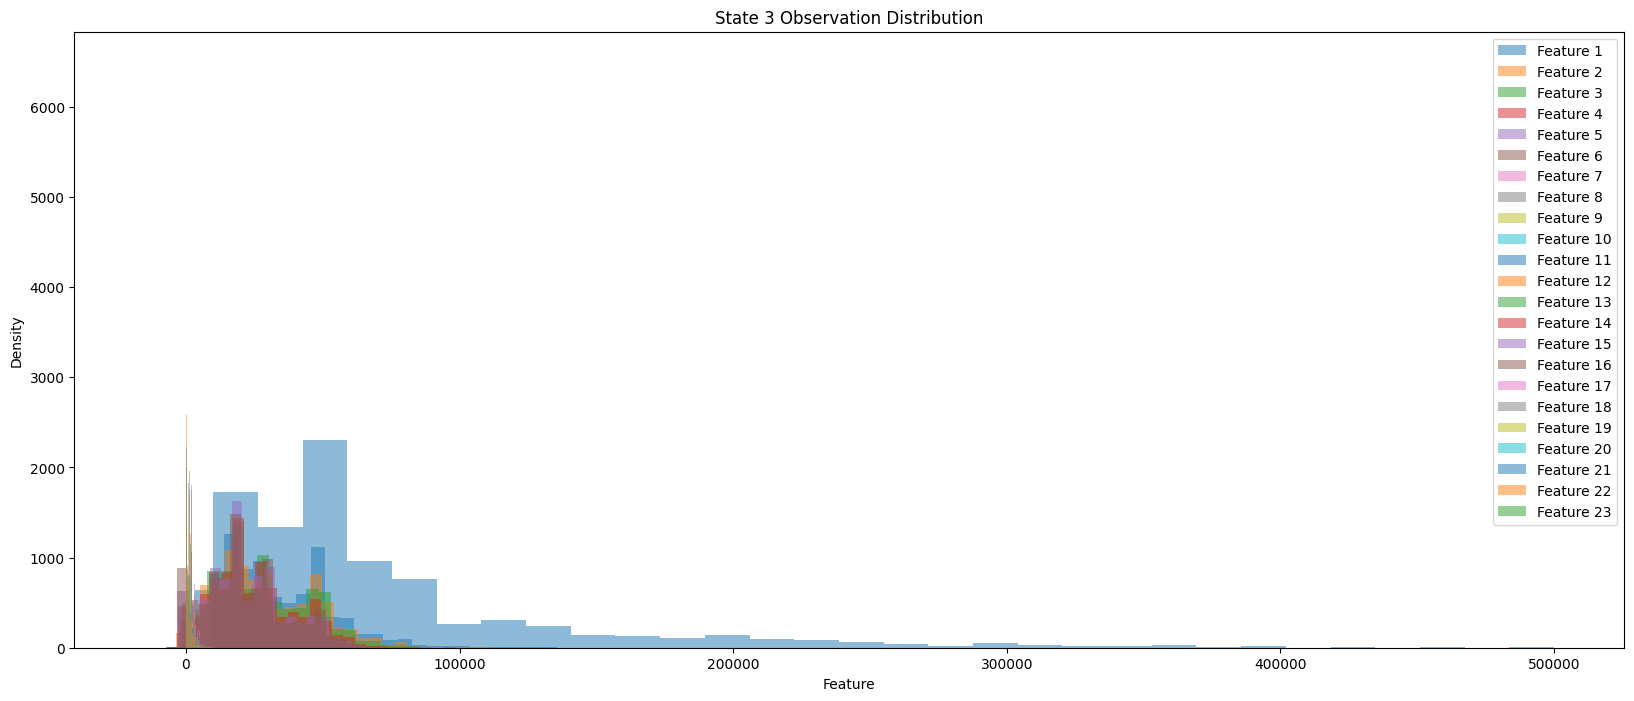

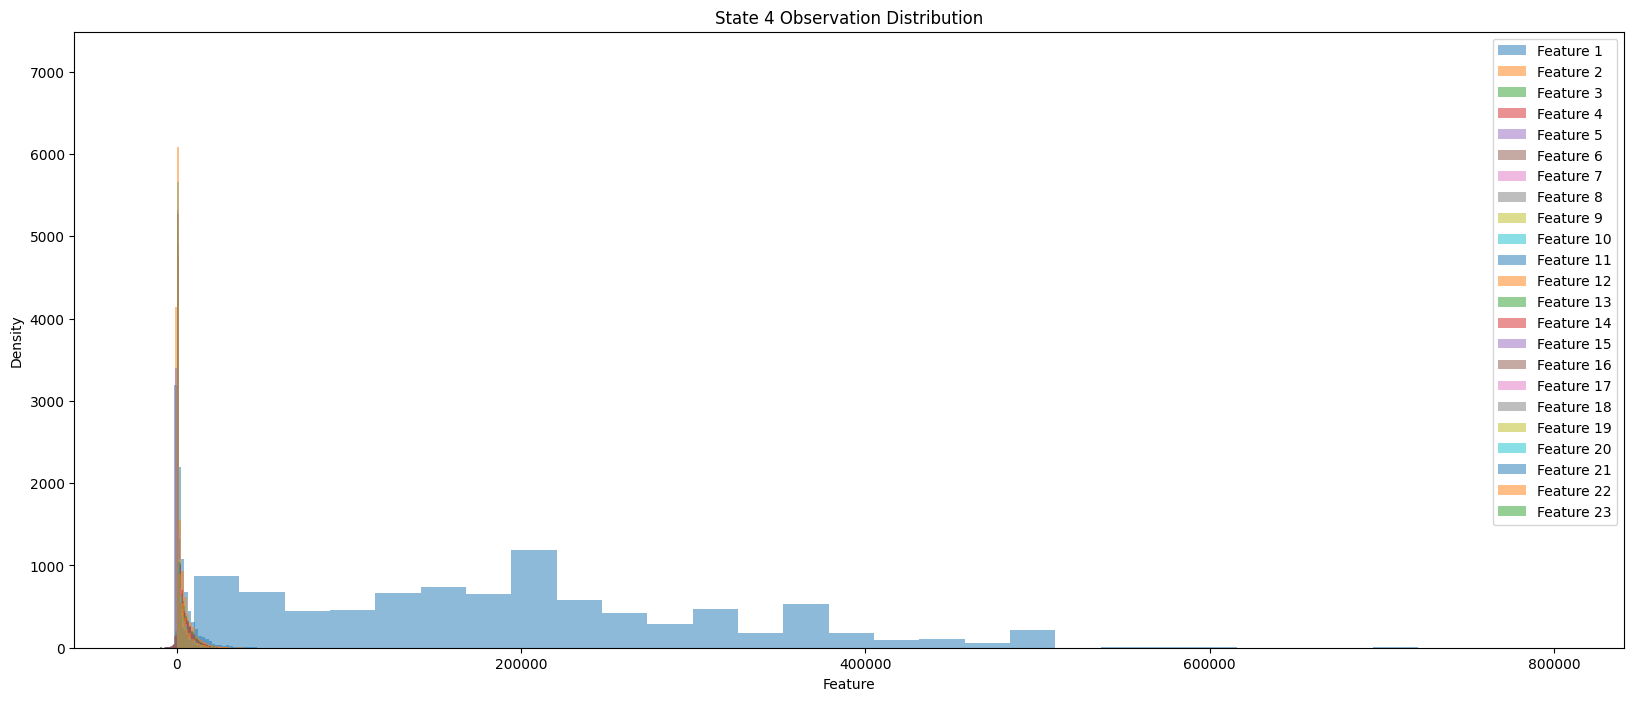

In [8]:
import matplotlib.pyplot as plt
# Plot the distribution of observations in each state
for i in range(n_components):
    plt.figure(figsize=(20, 8))
    plt.title(f"State {i+1} Observation Distribution")
    plt.xlabel("Feature")
    plt.ylabel("Density")
    for j in range(data.shape[1]):
        plt.hist(data[hidden_states == i, j], bins=30, alpha=0.5, label=f'Feature {j+1}')
    plt.legend()
    plt.show()


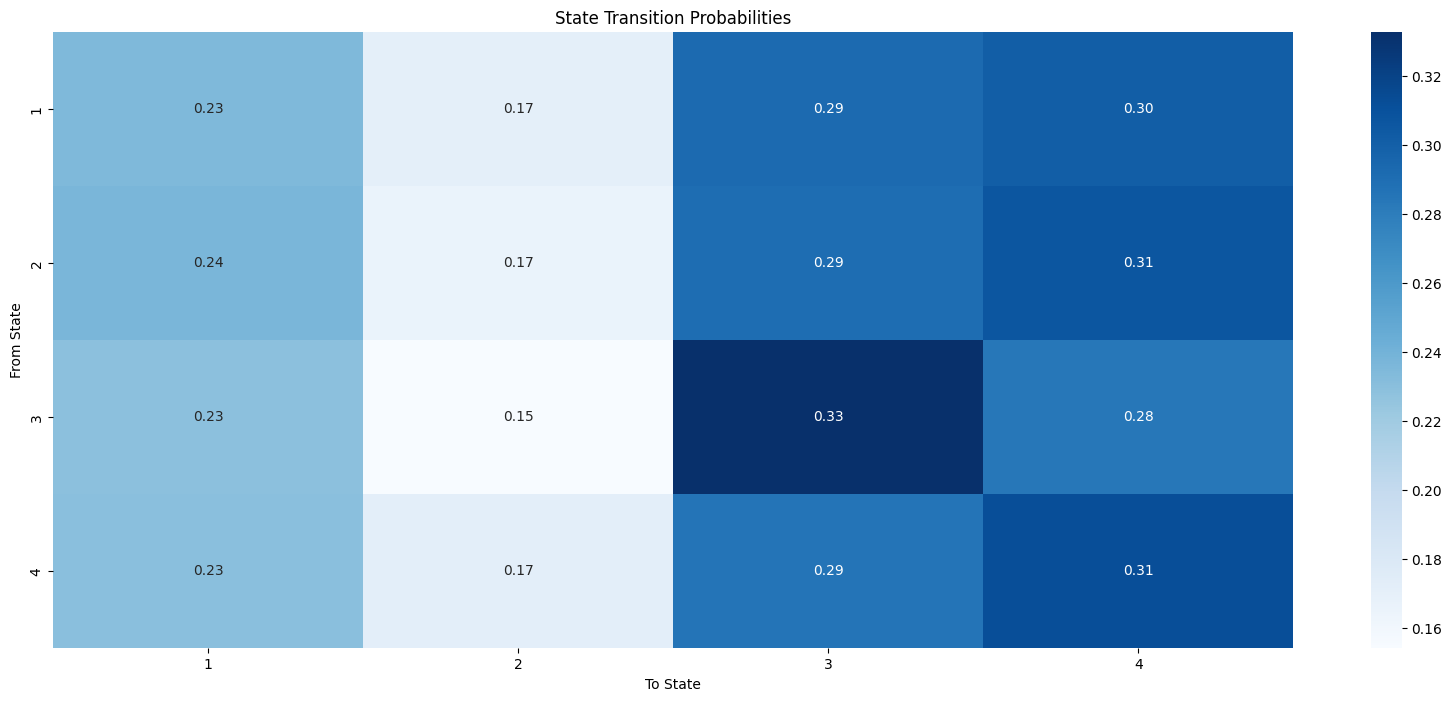

In [9]:
import seaborn as sns
# Create a heatmap of state transition probabilities
plt.figure(figsize=(20, 8))
sns.heatmap(model.transmat_, annot=True, cmap="Blues", fmt=".2f", xticklabels=range(1, n_components + 1), yticklabels=range(1, n_components + 1))
plt.title("State Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

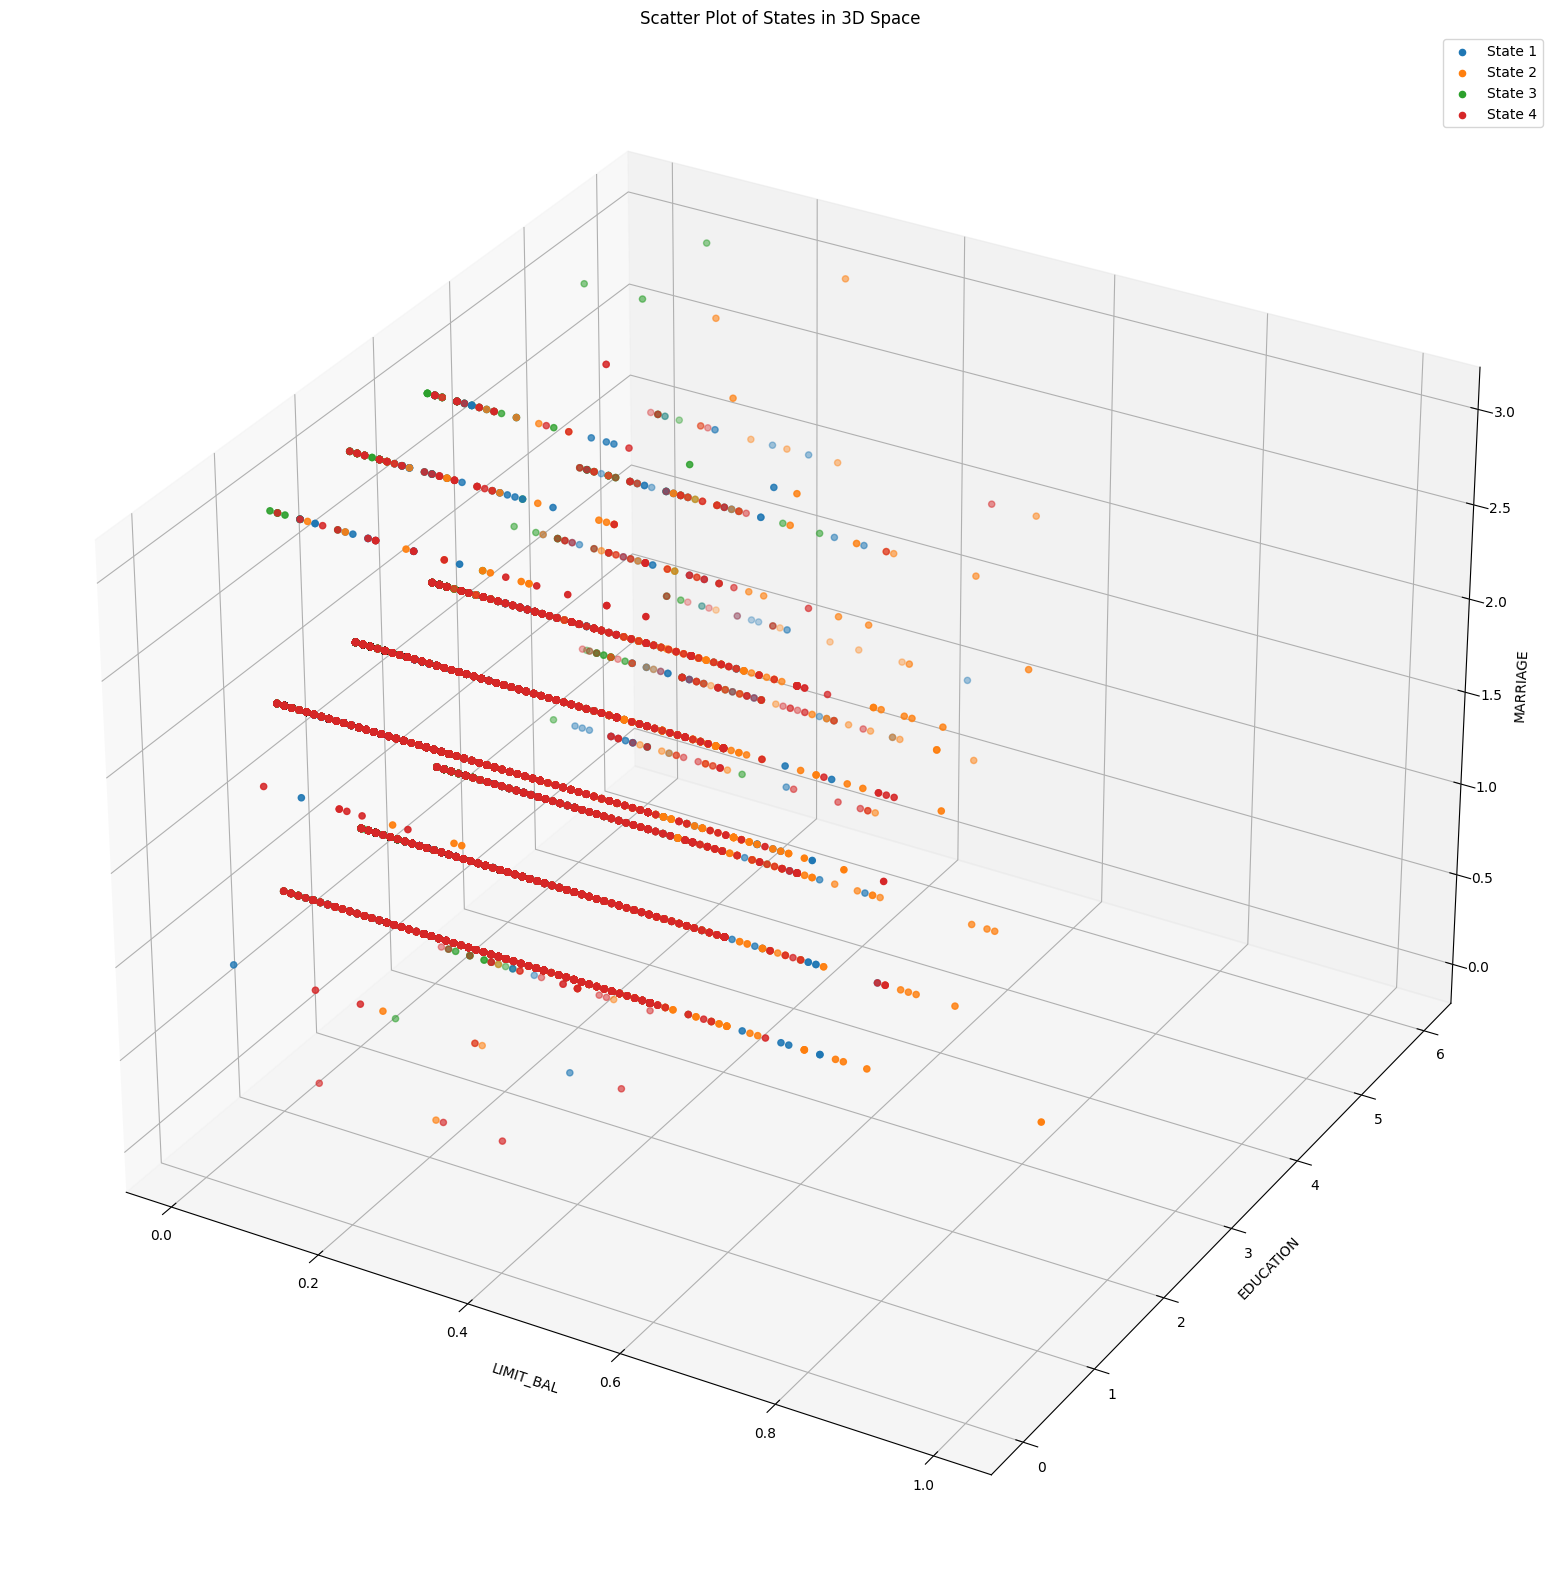

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Create scatter plots of selected features with color-coded states
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_components):
    ax.scatter(data[hidden_states == i, 0], data[hidden_states == i, 1], data[hidden_states == i, 2], label=f'State {i+1}')

ax.set_xlabel(selected_columns[0])
ax.set_ylabel(selected_columns[1])
ax.set_zlabel(selected_columns[2])
ax.legend()
plt.title("Scatter Plot of States in 3D Space")
plt.show()

gmm


In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

df=pd.read_csv('UCI_Credit_Card.csv')

selected_columns = ["LIMIT_BAL","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default.payment.next.month"]
data = df[selected_columns]

In [13]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [14]:
# Apply Gaussian Mixture Model
n_components = 4 # Segments
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(data)

# Add the predicted labels as a new column in your DataFrame
df['Cluster'] = labels

In [15]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

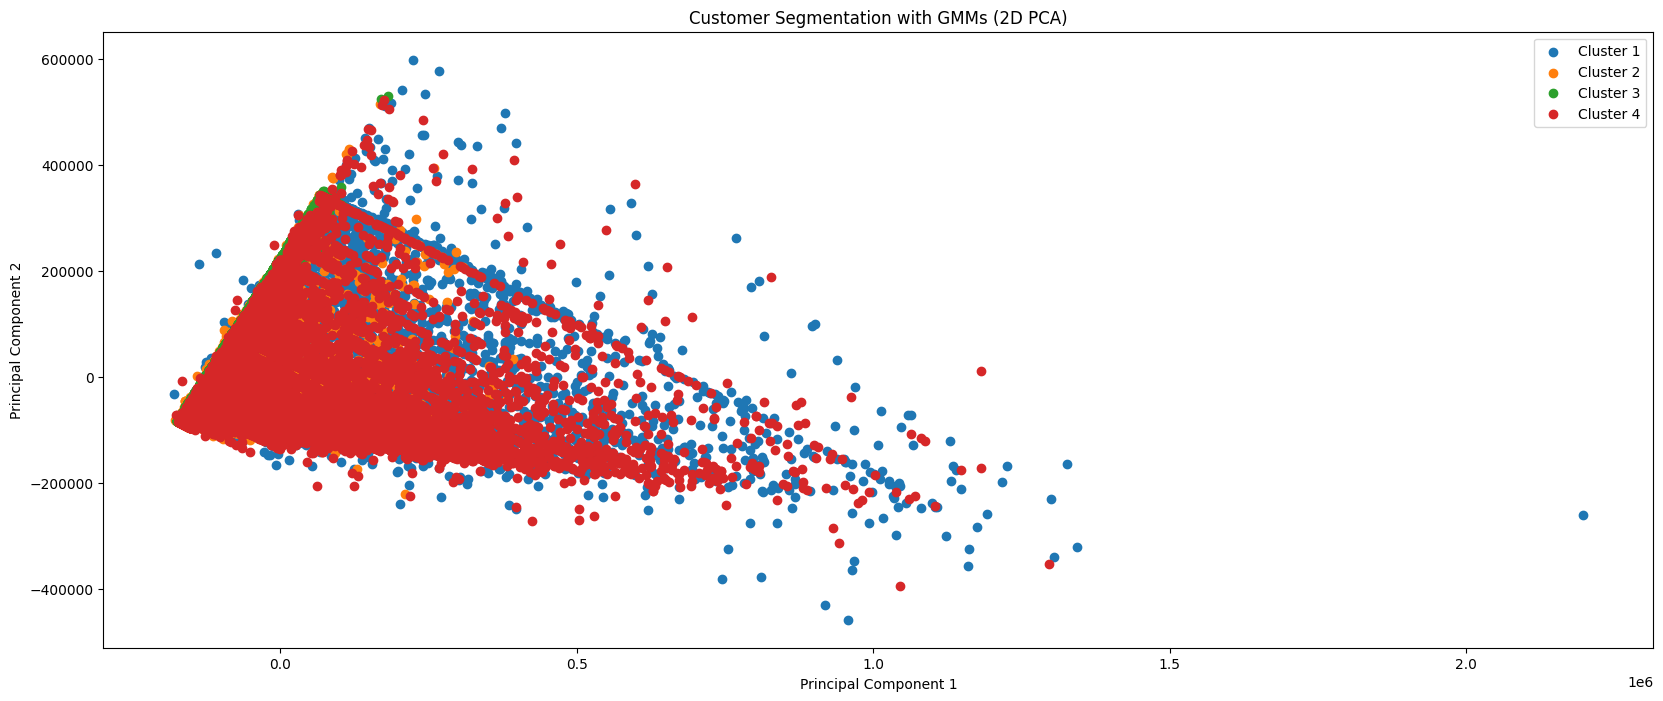

In [16]:
# Plot the clusters in 2D space
plt.figure(figsize=(20, 8))
for i in range(n_components):
    plt.scatter(data_2d[df['Cluster'] == i, 0], data_2d[df['Cluster'] == i, 1], label=f'Cluster {i+1}')

plt.title('Customer Segmentation with GMMs (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Naive Bayes

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
df = pd.read_csv("UCI_Credit_Card.csv")
data = df[selected_columns]

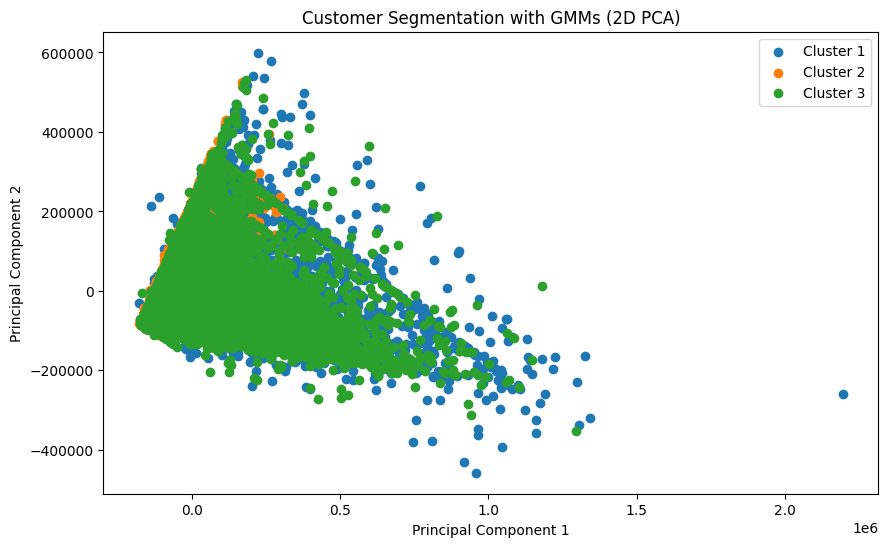

In [18]:
# Apply Gaussian Mixture Model (GMM)
n_components = 3  # Number of components (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(data)

# Add the predicted labels as a new column in your DataFrame
df['Cluster'] = labels

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.scatter(data_2d[df['Cluster'] == i, 0], data_2d[df['Cluster'] == i, 1], label=f'Cluster {i+1}')

plt.title('Customer Segmentation with GMMs (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


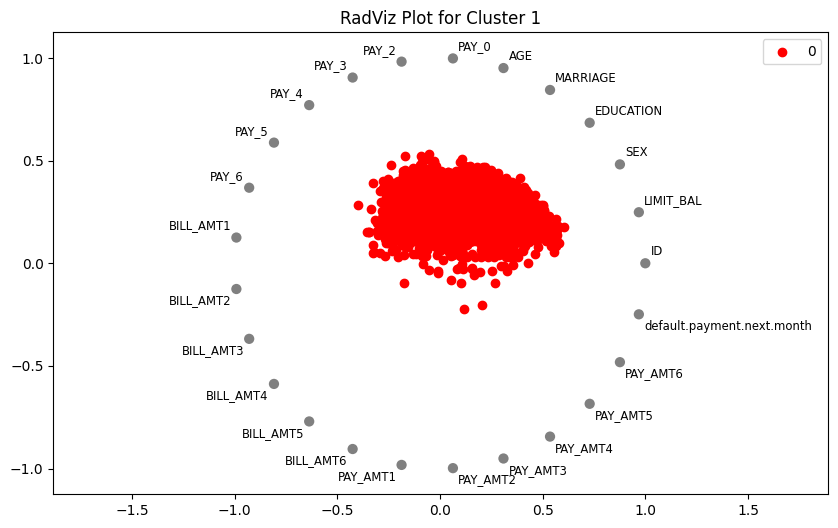

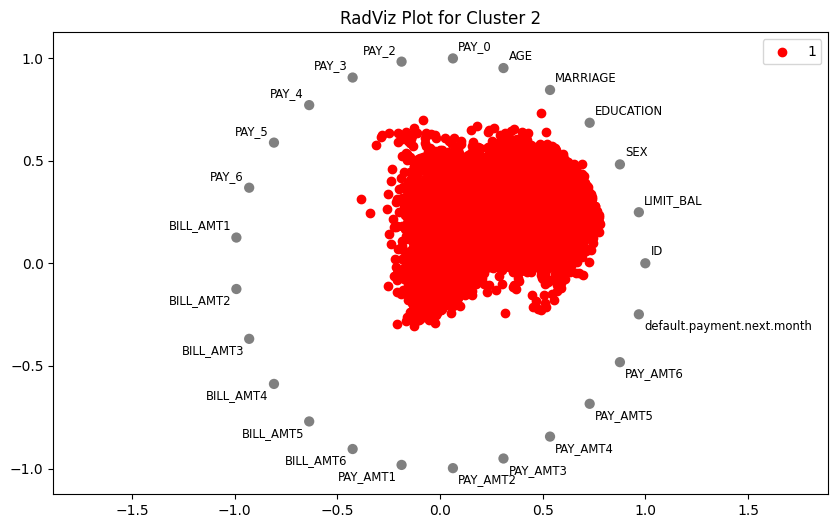

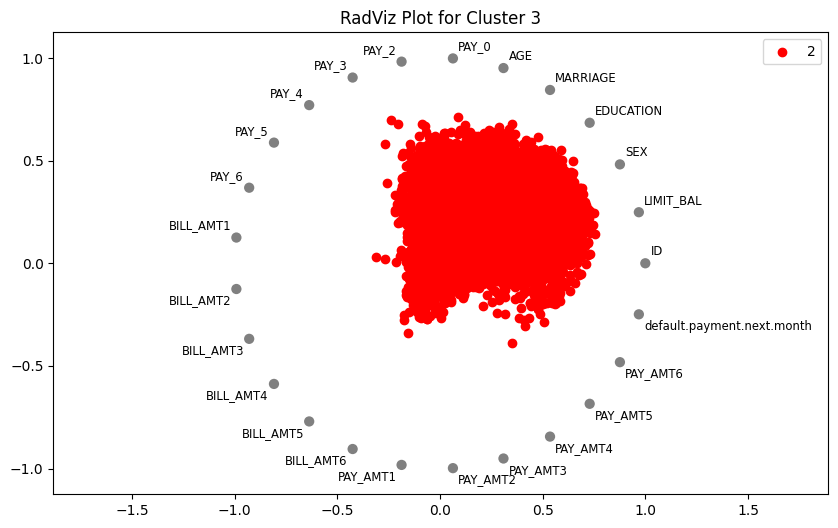

In [19]:
from pandas.plotting import radviz

# RadViz plot for each cluster
for i in range(n_components):
    plt.figure(figsize=(10, 6))
    radviz(df[df['Cluster'] == i], 'Cluster', color=['red', 'green', 'blue'])
    plt.title(f'RadViz Plot for Cluster {i+1}')
    plt.show()

Average silhouette_score: -0.03007233759527673


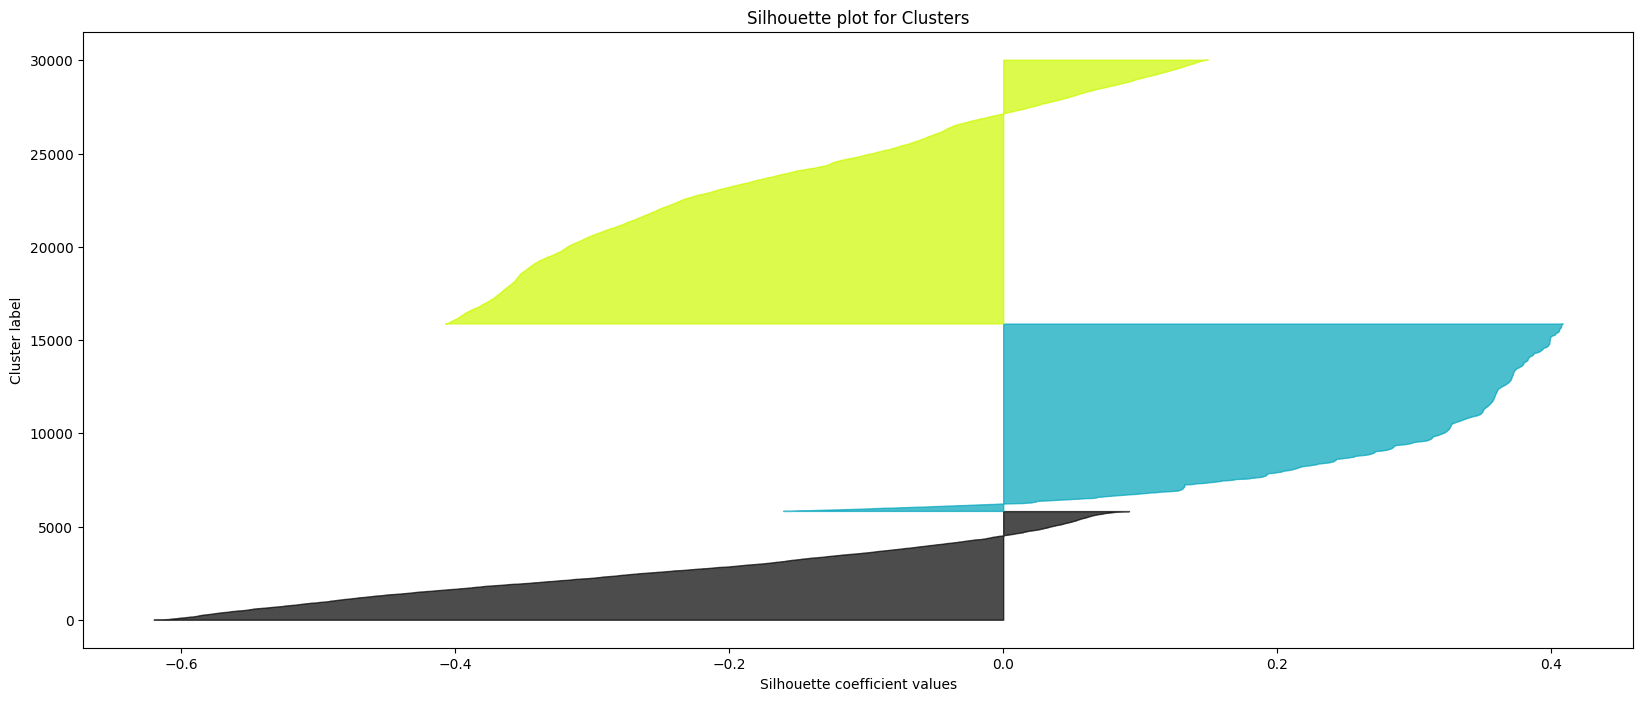

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(data, labels)
print(f"Average silhouette_score: {silhouette_avg}")

# Create a silhouette plot
plt.figure(figsize=(20, 8))
sample_silhouette_values = silhouette_samples(data, labels)

y_lower = 10
for i in range(n_components):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_components)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

plt.title("Silhouette plot for Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()
